Hola Marco!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
#Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import Pool, CatBoostRegressor

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

In [2]:
#Carga de Datos

df = pd.read_csv('/datasets/car_data.csv')
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [3]:
df.shape

(354369, 16)

In [4]:
#informacion general del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Se puede observar que existen valores ausentes en varias columnas, y se modificarán los nombres de las columnas también para que queden como minúsculas, además se observa que el campo que tiene fecha se encuentra como tipo objeto.

In [5]:
#Cambio de nombres de columnas a minusculas

df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
#Cambio de formato de columnas tipo objeto a fecha

date_columns = ['datecrawled', 'datecreated', 'lastseen']
for i in date_columns:
    df[i] = pd.to_datetime(df[i], format='%d/%m/%Y %H:%M')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        354369 non-null  datetime64[ns]
 1   price              354369 non-null  int64         
 2   vehicletype        316879 non-null  object        
 3   registrationyear   354369 non-null  int64         
 4   gearbox            334536 non-null  object        
 5   power              354369 non-null  int64         
 6   model              334664 non-null  object        
 7   mileage            354369 non-null  int64         
 8   registrationmonth  354369 non-null  int64         
 9   fueltype           321474 non-null  object        
 10  brand              354369 non-null  object        
 11  notrepaired        283215 non-null  object        
 12  datecreated        354369 non-null  datetime64[ns]
 13  numberofpictures   354369 non-null  int64   

In [7]:
#verificar valores ausentes
df.isna().sum()

datecrawled              0
price                    0
vehicletype          37490
registrationyear         0
gearbox              19833
power                    0
model                19705
mileage                  0
registrationmonth        0
fueltype             32895
brand                    0
notrepaired          71154
datecreated              0
numberofpictures         0
postalcode               0
lastseen                 0
dtype: int64

In [8]:
# Revisar el porcentaje que representan los valores ausentes por campo

print('Porcentaje de valores ausentes en vehicletype es:', df['vehicletype'].isna().sum()/354369*100, '%')
print()
print('Porcentaje de valores ausentes en gearbox es:', df['gearbox'].isna().sum()/354369*100, '%')
print()
print('Porcentaje de valores ausentes en model es:', df['model'].isna().sum()/354369*100, '%')
print()
print('Porcentaje de valores ausentes en fueltype es:', df['fueltype'].isna().sum()/354369*100, '%')
print()
print('Porcentaje de valores ausentes en notrepaired es:', df['notrepaired'].isna().sum()/354369*100, '%')

Porcentaje de valores ausentes en vehicletype es: 10.57936783409384 %

Porcentaje de valores ausentes en gearbox es: 5.596708515699737 %

Porcentaje de valores ausentes en model es: 5.560587974681758 %

Porcentaje de valores ausentes en fueltype es: 9.282696849893755 %

Porcentaje de valores ausentes en notrepaired es: 20.079070121822166 %


Con excepcion del campo notrepaired, los datos del resto de columnas podrian ser despreciables ya que representan menos del 10% del total de datos. 

En cuanto a los datos del campo notrepaired, se deberan analizar mas a fondo antes de tomar una decision.

In [9]:
df['notrepaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

En vista de que no tenemos certeza del 20% de vehiculos fueron reparados o no, rellenaremos estos datos como desconocido o 'unknown', caracteristica que podriamos usar para predecir el precio de un vehiculo

In [10]:
#Llenamos los ausentes de notrepaired con unknown

df['notrepaired'] = df['notrepaired'].fillna('unknown') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        354369 non-null  datetime64[ns]
 1   price              354369 non-null  int64         
 2   vehicletype        316879 non-null  object        
 3   registrationyear   354369 non-null  int64         
 4   gearbox            334536 non-null  object        
 5   power              354369 non-null  int64         
 6   model              334664 non-null  object        
 7   mileage            354369 non-null  int64         
 8   registrationmonth  354369 non-null  int64         
 9   fueltype           321474 non-null  object        
 10  brand              354369 non-null  object        
 11  notrepaired        354369 non-null  object        
 12  datecreated        354369 non-null  datetime64[ns]
 13  numberofpictures   354369 non-null  int64   

In [11]:
#Informacion descriptiva del dataset
df.describe()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


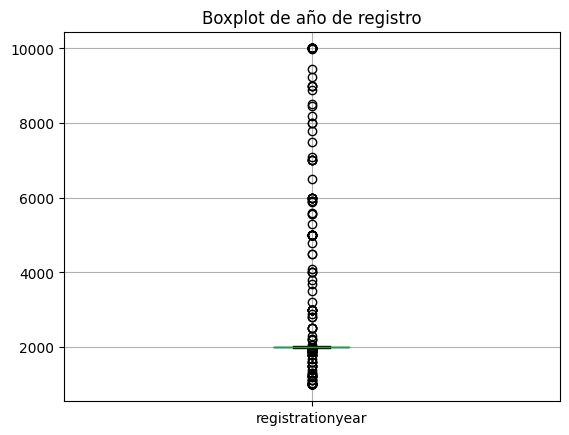

In [12]:
#revision de outliers del campo registrationyear
df[['registrationyear']].boxplot()
plt.title(f'Boxplot de año de registro')
plt.show()

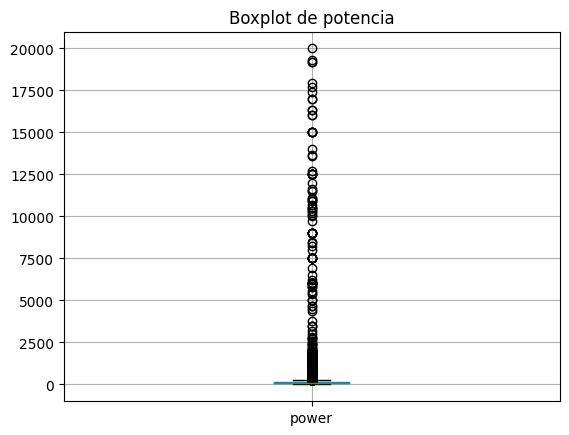

In [13]:
#revision de outliers del campo power
df[['power']].boxplot()
plt.title(f'Boxplot de potencia')
plt.show()

Se pueden observar que a nivel de años de registro, existen incongruencias ya que los años datan de años en el futuro

Por otra parte, la potencia de los motores también no se ven lógicos, ya que ciertos valores están completamente disparados y fuera de la realidad

Para corregir estos datos, usarmemos el valor de la mediana para reemplazar los valores del campo registrationyear y para el campo power, usaremos el valor promedio de la muestra.

In [14]:
#Crea los valores de las variables con los valores que reemplazaran los valores atipicos
registration_mediana = int(df['registrationyear'].median())
print(registration_mediana)
power_promedio = int(round(df['power'].mean(),0))
print(power_promedio)

2003
110


In [15]:
#Revisamos los valores de registrationyear para determinar los atipicos
df['registrationyear'].sort_values(ascending=True).unique()

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

Para reemplazar los valores, se ha determinado que los primeros autos aparecieron en 1886, asi que los valores menores a este año serán reemplazdos y los posteriores al 2024 también 

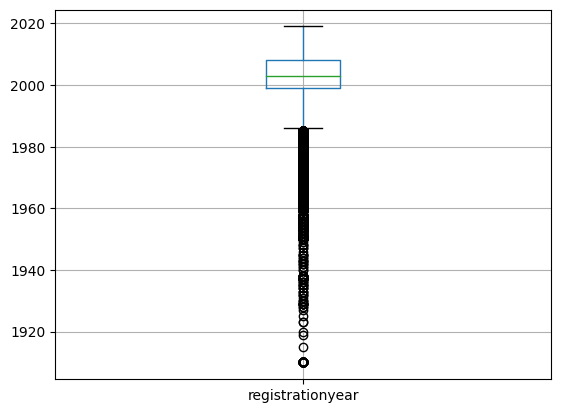

In [16]:
#Reemplazamos los valores de registrationyear
df.loc[df['registrationyear'] <= 1886,'registrationyear'] = registration_mediana
df.loc[df['registrationyear'] > 2024,'registrationyear'] = registration_mediana 

df[['registrationyear']].boxplot()
plt.show()

In [17]:
#Revisamos los valores de power
print(df['power'].sort_values(ascending=True).unique())

[    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98    99   100   101   102   103   104   105   106   107
   108   109   110   111   112   113   114   115   116   117   118   119
   120   121   122   123   124   125   126   127   128   129   130   131
   132   133   134   135   136   137   138   139   140   141   142   143
   144   145   146   147   148   149   150   151   152   153   154   155
   156   157   158   159   160   161   162   163   

In [18]:
#Verifica la cantidad de valores por potencia
df['power'].value_counts()

0        40225
75       24023
60       15897
150      14590
101      13298
         ...  
323          1
3454         1
1056         1
13636        1
1158         1
Name: power, Length: 712, dtype: int64

Se verifica que la potencia 0 se repite mucho y no es logico ese valor, por lo que debera ser reemplazado

Si bien es cierto el Renault Twizy 45 tiene apenas 5 HP, para este analisis usaremos 30 HP como el minimo

Para potencias maximas, existen vehiculos que poseen hasta 1.600 hps pero normalmente no estarian en un patio de autos, por lo que analizaremos un maximo de 650 HP

Todos estos valores atipicos tanto en maximo como en minimo seran reemplazados por el promedio de la muestra

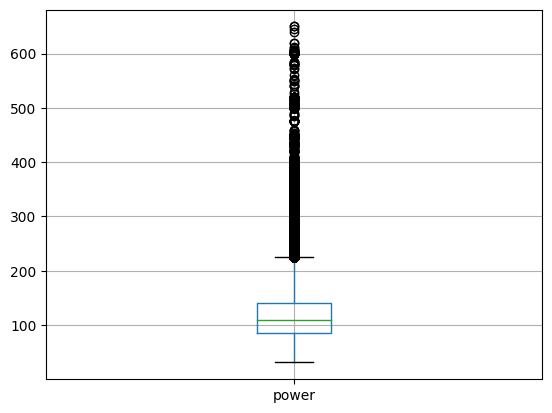

In [19]:
#Reemplazamos los valores de potencia
df.loc[df['power'] <= 30,'power'] = power_promedio
df.loc[df['power'] > 650,'power'] = power_promedio

df[['power']].boxplot()
plt.show()

Consecuencia de los cambios realizados, se observan que la distribucion de los valores de los campos intervenidos ahora son mas coherentes y no daran conclusiones erradas mas adelante.

Ahora que los datos han sido revisados se procede con el entrenamiento del modelo

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la preparación de los datos previo al entrenamiento del modelo! Aplicaste diferentes pero correctos procesos para tener un dataset más completo previo al entrenamiento. Te recomendaría que agregues tu interpretación un poco más detallada de los datos revisados y tratándose de un proyecto de ML también puedes enfocarte en interpretar en como estos datos pueden afectar los modelos
</div>

## Entrenamiento del modelo 

Dado que se tienen 2 tipos de variables en el dataset, se generaran dos listas, una que contenga variables categoricas y otra con variables numericas.

Variables como dates, registrationmonth, numberofpicstures, postalcode no se tomaran en cuenta en este analisis ya que no generan valor.

In [20]:
#Lista de variables

features_cat = ['vehicletype', 'gearbox','model', 'fueltype', 'brand',
       'notrepaired']
features = ['registrationyear','power', 'mileage']
target = 'price'

In [21]:
df_target = df[target]

df_target

0           480
1         18300
2          9800
3          1500
4          3600
          ...  
354364        0
354365     2200
354366     1199
354367     9200
354368     3400
Name: price, Length: 354369, dtype: int64

In [24]:
#Usamos OneHotEncoding para las variables categoricas

ohe = OneHotEncoder(sparse = False, drop='if_binary')

df_ohe = pd.DataFrame(ohe.fit_transform(df[features_cat]), columns = ohe.get_feature_names())

df_ohe

,x0_bus,x0_convertible,x0_coupe,x0_other,x0_sedan,x0_small,x0_suv,x0_wagon,x0_nan,x1_auto,...,x4_sonstige_autos,x4_subaru,x4_suzuki,x4_toyota,x4_trabant,x4_volkswagen,x4_volvo,x5_no,x5_unknown,x5_yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
354365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
354366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
354367,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Ten cuidado con el uso de OHE, antes de aplicarlo deberías hacer un estudio de las columnas (características o features) e ir tomando las que más valor aporten, si te das cuenta has generado muchas columnas lo que hace que los modelos en cuanto a tiempos de entrenamiento sean muy tardados
</div>

In [26]:
#Unir datos codificados con las tablas de variables numericas

concat_df = pd.concat([df[features].reset_index(drop=True),df_ohe],axis = 1)

concat_df

,registrationyear,power,mileage,x0_bus,x0_convertible,x0_coupe,x0_other,x0_sedan,x0_small,x0_suv,...,x4_sonstige_autos,x4_subaru,x4_suzuki,x4_toyota,x4_trabant,x4_volkswagen,x4_volvo,x5_no,x5_unknown,x5_yes
0,1993,110,150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2011,190,125000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2004,163,125000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2001,75,150000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2008,69,90000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2005,110,150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
354365,2005,110,20000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
354366,2000,101,125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
354367,1996,102,150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [27]:
#Se verifica que no existan valores ausentes

concat_df.isna().sum()

registrationyear    0
power               0
mileage             0
x0_bus              0
x0_convertible      0
                   ..
x4_volkswagen       0
x4_volvo            0
x5_no               0
x5_unknown          0
x5_yes              0
Length: 317, dtype: int64

Ahora podemos escalar los datos 


## Análisis del modelo

In [ ]:
#Escalamiento de los datos y separacion de datos de entrenamiento y prueba
scaler = MaxAbsScaler()
scaler.fit(concat_df[features])
concat_df[features] = scaler.transform(concat_df[features])
concat_df[features]
features_train, features_valid, target_train, target_valid = train_test_split(concat_df, df_target, test_size=0.20, random_state=92)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Ahora tienes los set de datos listos para el entrenamiento, además el escalado aplicado a los diferentes grupos de datos ayuda a prevenir el data leakage y así poder evaluar mejor tus modelos
</div>

Luego del escalamiento de los datos, estos estan listos para usarse para el entrenamiento de regresion lineal

In [ ]:
#Entrenamiento del modelo

#Se crea un dataframe de comparacion

global_results = {'conjunto':[],
                 'tipo':[],
                 'modelo':[],
                  'RECM':[],
                 'tiempo_entrenamiento':[],
                 'tiempo_prediccion':[]}
global_results = pd.DataFrame(global_results)

In [ ]:
def add_results(train_result,valid_result,time,timep,conjunto,model,table):
    """Con esta funcion agregaremos los valores del nombre y tipo de conjunto, su valor de RECM, el tiempo de procesamiento/entrenamiento,
    y el tipo de modelo, con los siguientes argumentos
    train_result: resultado de RECM conjunto entrenamiento
    valid_result: resultado de RECM conjunto validacion
    time: resultado del tiempo de procesamiento
    conjunto: nombre del conjunto
    model: tipo de modelo,
    table: tabla a la que se agregaran los resultados
    """
    row1 = pd.DataFrame({'conjunto':[conjunto],'tipo' : ['train'], 'modelo':[model],'RECM': [train_result],'tiempo_entrenamiento': [time],'tiempo_prediccion': [timep]})
    row2 = pd.DataFrame({'conjunto':[conjunto],'tipo' : ['valid'], 'modelo':[model],'RECM': [valid_result],'tiempo_entrenamiento': [time],'tiempo_prediccion': [timep]})
    table = pd.concat([table,row1,row2])
    return table

In [ ]:
#Regresion Lineal

def linear_model(data,data_target):
    """Con esta funcion se realiza el entrenamiento, prediccion y puntuacion con RECM del modelo de regresion lineal, parametros:
    data: conjunto de datos a utilizar
    data_target: objetivo del conjunto
    
    """
   
    start_time = time.time()
    model = LinearRegression()
    model.fit(features_train,target_train)
    end_time = time.time()
    training_time = round(end_time - start_time,2)
    print('Tiempo de entrenamiento:', training_time,'segundos')
    start_timep = time.time()
    train_pred = model.predict(features_train)
    valid_pred = model.predict(features_valid)
    end_timep = time.time()
    predict_time = round(end_timep - start_timep,2)
    print('Tiempo de prediccion:', predict_time,'segundos')
    #Prueba de cordura
    cord_test = mean_squared_error(target_train,pd.Series(target_train.mean(),index=target_train),squared=False)
    print('La prueba de cordura de la raiz del error cuadratico medio  para el conjunto de entrenamiento es:',cord_test)
    cord_valid = mean_squared_error(target_valid,pd.Series(target_valid.mean(),index=target_valid),squared=False)
    print('La prueba de cordura de la raiz del error cuadratico medio  para el conjunto de validación es:',cord_valid)
    recm_train = mean_squared_error(target_train,train_pred,squared=False)
    print('La raiz del error cuadratico medio del conjunto de entrenamiento es:',recm_train)
    recm_valid = mean_squared_error(target_valid,valid_pred,squared=False)
    print('La raiz del error cuadratico medio del conjunto de validación es:',recm_valid)
   
    return recm_train, recm_valid, training_time, predict_time




In [ ]:
df_linear_train_result, df_linear_valid_result,df_linear_time,df_linear_timep = linear_model(concat_df,df_target)


In [ ]:
global_results = add_results(df_linear_train_result, df_linear_valid_result,df_linear_time,df_linear_timep,'df','linear_regression',global_results)

global_results

In [ ]:
#Modelo Random Forest

#Modelo Random Forest

def random_model(data, data_target):
    """Con esta función se realiza el entrenamiento, predicción y puntuación con RECM del modelo de RandomForestRegressor.
    Parámetros:
    data: conjunto de datos a utilizar
    data_target: objetivo del conjunto
    """
    start_time = time.time()
    model = RandomForestRegressor(n_estimators=50, max_depth=3, n_jobs=-1, random_state=92)
    model.fit(features_train, target_train)
    end_time = time.time()
    training_time = round(end_time - start_time, 2)
    print('Tiempo de entrenamiento:', training_time, 'segundos')
    
    start_timep = time.time()
    train_pred = model.predict(features_train)
    valid_pred = model.predict(features_valid)
    end_timep = time.time()
    predict_time = round(end_timep - start_timep, 2)
    print('Tiempo de prediccion:', predict_time, 'segundos')
    # Prueba de cordura
    cord_test = mean_squared_error(target_train, pd.Series(target_train.mean(), index=target_train), squared=False)
    print('La prueba de cordura de la raíz del error cuadrático medio para el conjunto de entrenamiento es:', cord_test)
    cord_valid = mean_squared_error(target_valid, pd.Series(target_valid.mean(), index=target_valid), squared=False)
    print('La prueba de cordura de la raíz del error cuadrático medio para el conjunto de validación es:', cord_valid)
    
    recm_train = mean_squared_error(target_train, train_pred, squared=False)
    print('La raíz del error cuadrático medio del conjunto de entrenamiento es:', recm_train)
    recm_valid = mean_squared_error(target_valid, valid_pred, squared=False)
    print('La raíz del error cuadrático medio del conjunto de validación es:', recm_valid)
   
    return recm_train, recm_valid, training_time, predict_time




In [ ]:
df_random_train_result, df_random_valid_result,df_random_time_result,df_random_timep_result = random_model(concat_df,df_target)

In [ ]:
global_results = add_results(df_random_train_result, df_random_valid_result,df_random_time_result,df_random_timep_result,'df','random_forest',global_results)


In [ ]:
#Modelo Tree Regresor

def tree_model(data, data_target):
    """Con esta función se realiza el entrenamiento, predicción y puntuación con RECM del modelo de DecisionTreeRegressor.
    Parámetros:
    data: conjunto de datos a utilizar
    data_target: objetivo del conjunto
    """
    
    start_time = time.time()
    model = DecisionTreeRegressor(random_state=92)
    param = {'max_depth': [None, 5, 10]}
    rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=5, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, random_state=92)
    rs.fit(features_train, target_train)
    end_time = time.time()
    training_time = round(end_time - start_time, 2)
    print('Tiempo de entrenamiento:', training_time, 'segundos')
    
    start_timep = time.time()
    train_pred = rs.best_estimator_.predict(features_train)
    valid_pred = rs.best_estimator_.predict(features_valid)
    end_timep = time.time()
    predict_time = round(end_timep - start_timep, 2)
    print('Tiempo de prediccion:', predict_time, 'segundos')
    # Prueba de cordura
    cord_test = mean_squared_error(target_train, pd.Series(target_train.mean(), index=target_train), squared=False)
    print('La prueba de cordura de la raíz del error cuadrático medio para el conjunto de entrenamiento es:', cord_test)
    cord_valid = mean_squared_error(target_valid, pd.Series(target_valid.mean(), index=target_valid), squared=False)
    print('La prueba de cordura de la raíz del error cuadrático medio para el conjunto de validación es:', cord_valid)
    
    recm_train = mean_squared_error(target_train, train_pred, squared=False)
    print('La raíz del error cuadrático medio del conjunto de entrenamiento es:', recm_train)
    recm_valid = mean_squared_error(target_valid, valid_pred, squared=False)
    print('La raíz del error cuadrático medio del conjunto de validación es:', recm_valid)
   
    return recm_train, recm_valid, training_time, predict_time


In [ ]:
df_tree_train_result, df_tree_valid_result,df_tree_time_result,df_tree_timep_result = tree_model(concat_df,df_target)

In [ ]:
global_results = add_results(df_tree_train_result, df_tree_valid_result,df_tree_time_result,df_tree_timep_result,'df','decission tree',global_results)

Se han probado varios modelos para entrenamiento y predicción. El modelo de Random Forest ha obtenido la mejor calificación según la métrica RECM, aunque es el más lento en entrenar. 

Por otro lado, los modelos de Decision Tree y Logistic Regression son rápidos de entrenar, pero presentan sobreajuste y su calificación en RECM no es muy buena.

In [ ]:
#LightGBM

def lgbm_tree_regressor(data,target):
    """Con esta funcion se realiza el entrenamiento, prediccion y puntuacion con RECM del modelo de LightGBM, parametros:
    data: conjunto de datos a utilizar
    data_target: objetivo del conjunto
    """
    
    params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': 'root_mean_squared_error',
    'force_row_wise': True}
    lgb_train = lgb.Dataset(features_train,target_train)
    lgb_eval = lgb.Dataset(features_valid,target_valid, reference = lgb_train)
    start_time = time.time()
    model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
    end_time = time.time()
    training_time = round(end_time - start_time,2)
    print('Tiempo de entrenamiento:', training_time,'segundos')
    
    start_timep = time.time()
    train_pred = model.predict(features_train)
    valid_pred = model.predict(features_valid)
    end_timep = time.time()
    predict_time = round(end_timep - start_timep,2)
    print('Tiempo de prediccion:', predict_time,'segundos')
     #Prueba de cordura
    cord_test = mean_squared_error(target_train,pd.Series(target_train.mean(),index=target_train),squared=False)
    print('La prueba de cordura de la raiz del error cuadratico medio  para el conjunto de entrenamiento es:',cord_test)
    cord_valid = mean_squared_error(target_valid,pd.Series(target_valid.mean(),index=target_valid),squared=False)
    print('La prueba de cordura de la raiz del error cuadratico medio  para el conjunto de validación es:',cord_valid)
    recm_train = mean_squared_error(target_train,train_pred,squared=False)
    print('La raiz del error cuadratico medio del conjunto de entrenamiento es:',recm_train)
    recm_valid = mean_squared_error(target_valid,valid_pred,squared=False)
    print('La raiz del error cuadratico medio del conjunto de validación es:',recm_valid)
    return recm_train, recm_valid,training_time, predict_time


In [ ]:
df_lgbmtree_train_result, df_lgbmtree_valid_result,df_lgbmtree_time_result,df_lgbmtree_timep_result = lgbm_tree_regressor(concat_df,df_target)

In [ ]:
global_results = add_results(df_lgbmtree_train_result, df_lgbmtree_valid_result,df_lgbmtree_time_result,df_lgbmtree_timep_result,'df','LGBM_tree',global_results)


In [ ]:
#LightGBM RandonForest

def lgbm_random_regressor(data,target):
    """Con esta funcion se realiza el entrenamiento, prediccion y puntuacion con RECM del modelo de LightGBM, parametros:
    data: conjunto de datos a utilizar
    data_target: objetivo del conjunto
    """
    
    params = {
    'task': 'train', 
    'boosting': 'rf',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': 'root_mean_squared_error',
    'force_row_wise': True,
    'bagging_fraction': 0.5,
    'bagging_freq':1,
    'feature_fraction':0.9}
    lgb_train = lgb.Dataset(features_train,target_train)
    lgb_eval = lgb.Dataset(features_valid,target_valid, reference = lgb_train)
    start_time = time.time()
    model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
    end_time = time.time()
    training_time = round(end_time - start_time,2)
    print('Tiempo de entrenamiento:', training_time,'segundos')
    
    start_timep = time.time()
    train_pred = model.predict(features_train)
    valid_pred = model.predict(features_valid)
    end_timep = time.time()
    predict_time = round(end_timep - start_timep,2)
    print('Tiempo de prediccion:', predict_time,'segundos')
     #Prueba de cordura
    cord_test = mean_squared_error(target_train,pd.Series(target_train.mean(),index=target_train),squared=False)
    print('La prueba de cordura de la raiz del error cuadratico medio  para el conjunto de entrenamiento es:',cord_test)
    cord_valid = mean_squared_error(target_valid,pd.Series(target_valid.mean(),index=target_valid),squared=False)
    print('La prueba de cordura de la raiz del error cuadratico medio  para el conjunto de validación es:',cord_valid)
    recm_train = mean_squared_error(target_train,train_pred,squared=False)
    print('La raiz del error cuadratico medio del conjunto de entrenamiento es:',recm_train)
    recm_valid = mean_squared_error(target_valid,valid_pred,squared=False)
    print('La raiz del error cuadratico medio del conjunto de validación es:',recm_valid)
    return recm_train, recm_valid,training_time, predict_time

In [ ]:
df_lgbmrandom_train_result, df_lgbmrandom_valid_result,df_lgbmrandom_time_result,df_lgbmrandom_timep_result = lgbm_random_regressor(concat_df,df_target)

In [ ]:
global_results = add_results(df_lgbmrandom_train_result, df_lgbmrandom_valid_result,df_lgbmrandom_time_result,df_lgbmrandom_timep_result,'df','LGBM_random',global_results)


In [ ]:
features = ['vehicletype', 'registrationyear', 'gearbox','power', 'model', 'mileage','fueltype', 'brand',
            'notrepaired']


In [ ]:
df[['vehicletype','gearbox','model','fueltype']] = df[['vehicletype','gearbox','model','fueltype']].fillna('unknown')

In [ ]:
def catboost_regressor(data,target,features,cat_features):
    """Con esta funcion se realiza el entrenamiento, prediccion y puntuacion con RECM del modelo de catboostregressor, parametros:
    data: conjunto de datos a utilizar
    target: objetivo del conjunto
    features: caracteristicas del conjunto data
    cat_features = variables categoricas de features
    """
    features_train, features_valid, target_train, target_valid = train_test_split(data[features], target, test_size=0.20, random_state=92)
    start_time = time.time()
    model = CatBoostRegressor(random_state=92)
    model.fit(features_train,target_train,cat_features=cat_features)
    end_time = time.time()
    training_time = round(end_time - start_time,2)
    print('Tiempo de entrenamiento:', training_time,'segundos')
    
    start_timep = time.time()
    train_pred = model.predict(features_train)
    valid_pred = model.predict(features_valid)
    end_timep = time.time()
    predict_time = round(end_timep - start_timep,2)
    print('Tiempo de prediccion:', predict_time,'segundos')
    
     #Prueba de cordura
    cord_test = mean_squared_error(target_train,pd.Series(target_train.mean(),index=target_train),squared=False)
    print('La prueba de cordura de la raiz del error cuadratico medio  para el conjunto de entrenamiento es:',cord_test)
    cord_valid = mean_squared_error(target_valid,pd.Series(target_valid.mean(),index=target_valid),squared=False)
    print('La prueba de cordura de la raiz del error cuadratico medio  para el conjunto de validación es:',cord_valid)
    recm_train = mean_squared_error(target_train,train_pred,squared=False)
    print('La raiz del error cuadratico medio del conjunto de entrenamiento es:',recm_train)
    recm_valid = mean_squared_error(target_valid,valid_pred,squared=False)
    print('La raiz del error cuadratico medio del conjunto de validación es:',recm_valid)
    return recm_train, recm_valid,training_time, predict_time

In [ ]:
df_catboost_train_result, df_catboost_valid_result, df_catboost_time_result, df_catboost_timep_result = catboost_regressor(df,df_target,features,features_cat)

In [ ]:
global_results = add_results(df_catboost_train_result, df_catboost_valid_result, df_catboost_time_result,df_catboost_timep_result,'df','Catboost',global_results)

In [ ]:
#Tabla comparativa de resultados

global_results


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con los entrenamientos y calculando los tiempos del mismo@
</div>

In [ ]:
#Revision de datos de acuerdo con la mejor metrica y mejor tiempo de procesamiento

display(global_results.query('tipo == "valid"').sort_values(by='RECM'))
global_results.query('tipo == "valid"').sort_values(by='RECM').plot(x='modelo',
                                                                   y='RECM',
                                                                   kind='bar')
plt.title('RECM de modelos entrenados')
plt.show()

In [ ]:
display(global_results.query('tipo == "valid"').sort_values(by='tiempo_entrenamiento'))
global_results.query('tipo == "valid"').sort_values(by='tiempo_entrenamiento').plot(x='modelo',
                                                                   y='tiempo_entrenamiento',
                                                                   kind='bar')
plt.title('RECM de modelos entrenados')
plt.show()

## Conclusiones

* Los modelos con una mejor metrica de RECM son Catboost, RandomForestRegressor seguido de LightGBM, con una evaluacion de menos de 2000 de RECM lo que lo hace un buen modelo

* El tiempo de entrenamiento de los modelos de DesicionTree y Catboost son los mas altos llevandose el primer lugar el modelo de RandomForest con mas de 500 segundos equivalente a 10min aproximadamente

* El modelo catboost tiene el mayor tiempo de predicción pero las diferencias son minimas con respecto al resto de modelos

* El modelo de Catboost a pesar de tener tiempo de entrenamiento equivalente a 7 min, tiene la mejor puntuación de RECM, por lo que en este caso seria la mejor opcion para este analisis


<div class="alert alert-block alert-danger">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un muy buen trabajo con tu proyecto y el entrenamiento de tus modelos. Un modelo no vive solo en un notebook, en un entorno laboral estos modelos se suelen exponer mediante APIs para que puedan ser consumidos por lo que es importante el tiempo de respuesta que estos modelos, por lo que haría falta que analices también el tiempo que le toma a cada modelo en terminar el `.predict`
</div>


<div class="alert alert-block alert-info">
<b>Se añade una nueva columna con los tiempos de predicción de cada uno de los modelos de acuerdo con la recomendación del revisor, lo que da un valor adicional al momento de elegir el mejor modelo</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo Marco! Siempre es bueno tener en cuenta estas métricas antes de sacar un modelo a un entorno productivo porque cada segundo cuenta y es mejor escoger el mejor modelo en cuanto a respuestas

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos